In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

In [ ]:
cols=['Soil_Quality','Seed_Variety','Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm','Irrigation_Schedule','Yield_kg_per_hectare']
agri_yield=pd.read_csv("agricultural_yield.csv",skipinitialspace=True)
agri_yield.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [ ]:
agri_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Soil_Quality                      4000 non-null   float64
 1   Seed_Variety                      4000 non-null   int64  
 2   Fertilizer_Amount_kg_per_hectare  4000 non-null   float64
 3   Sunny_Days                        4000 non-null   float64
 4   Rainfall_mm                       4000 non-null   float64
 5   Irrigation_Schedule               4000 non-null   int64  
 6   Yield_kg_per_hectare              4000 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 218.9 KB


In [ ]:
agri_yield.describe()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,74.924952,0.70375,173.447166,99.841525,502.246625,4.977500,709.167849
std,14.496298,0.45666,72.298671,9.888547,99.222767,2.259816,199.497621
min,50.003622,0.00000,50.062655,66.724469,102.007518,0.000000,108.252421
25%,62.380142,0.00000,108.734463,93.101146,435.810131,3.000000,576.382146
50%,74.630855,1.00000,175.596395,99.762840,502.877959,5.000000,722.532738
75%,87.792071,1.00000,235.200606,106.447769,568.249383,6.000000,847.814106
max,99.998898,1.00000,299.992054,138.520202,876.694217,15.000000,1406.110705


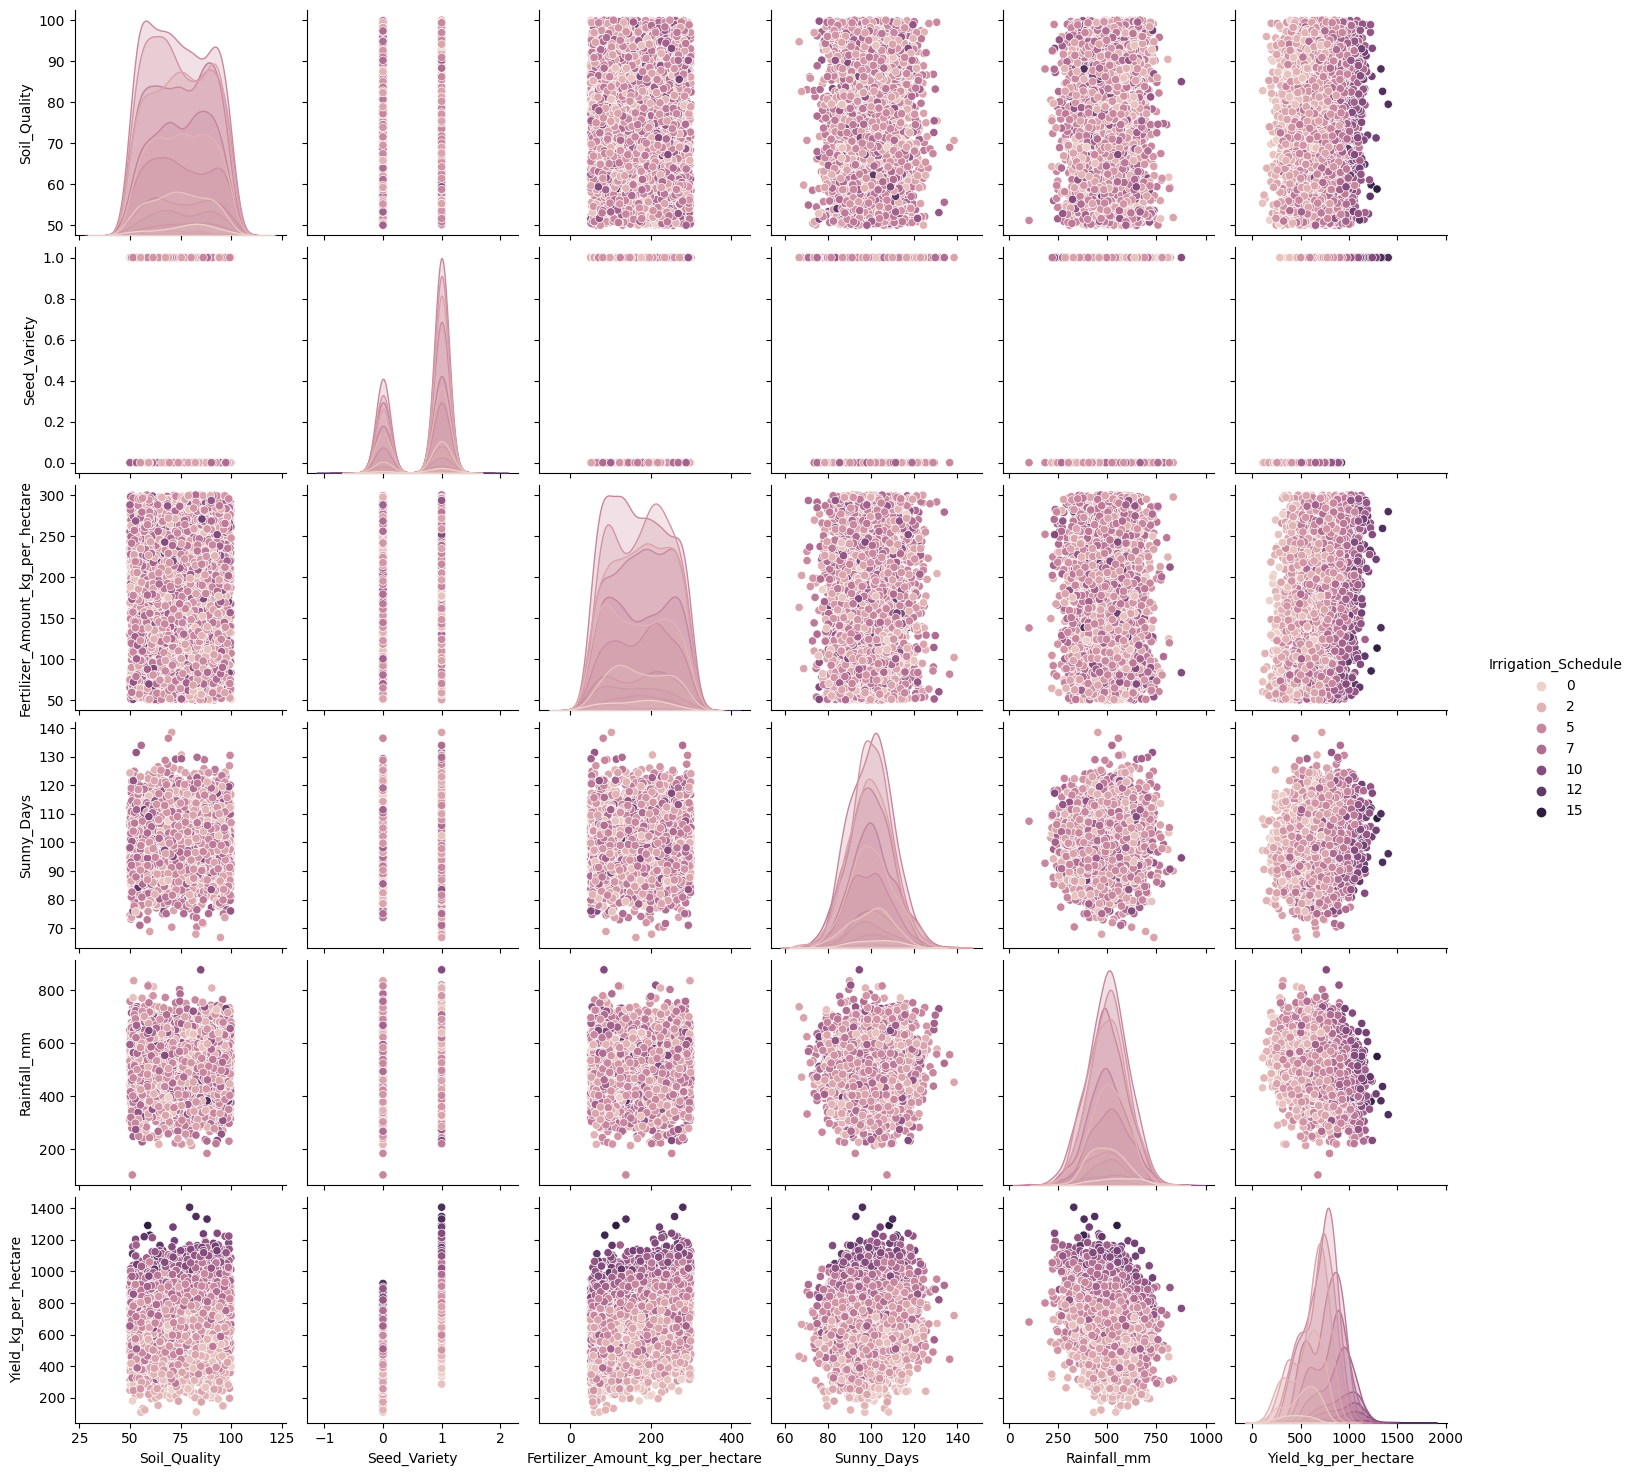

In [ ]:
sns.pairplot(agri_yield,hue='Irrigation_Schedule')

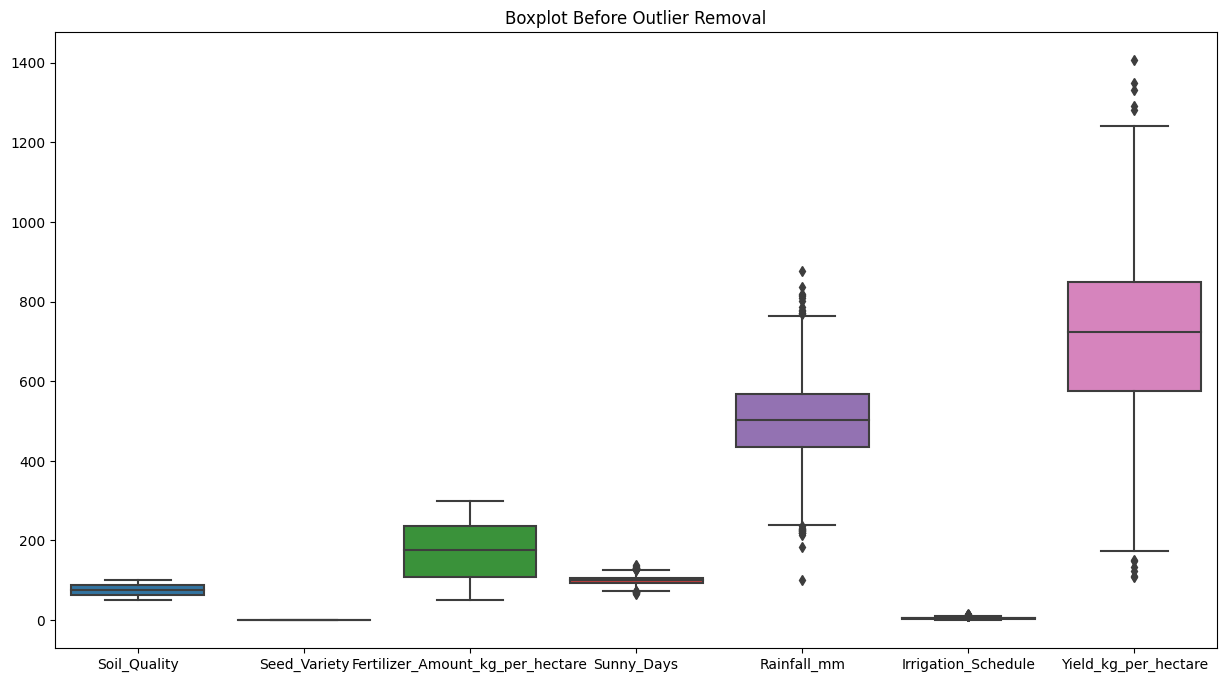

In [ ]:
#Visualizing with plots
plt.figure(figsize=(15, 8))
sns.boxplot(agri_yield)
plt.title('Boxplot Before Outlier Removal')
plt.show()

In [ ]:
Q1 = agri_yield.quantile(0.25)
Q3 = agri_yield.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers and create a mask
outlier_mask = ((agri_yield < lower_bound) | (agri_yield > upper_bound)).any(axis=1)

# Remove outliers from the dataset
agri_yield_no_outliers = agri_yield[~outlier_mask]

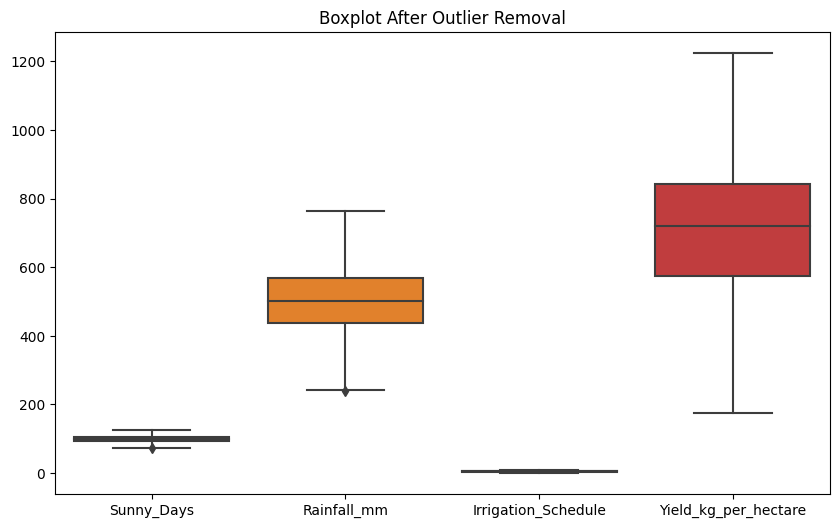

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=agri_yield_no_outliers[['Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule', 'Yield_kg_per_hectare']])
plt.title('Boxplot After Outlier Removal')
plt.show()

In [ ]:
agri_yield.isnull().sum()

Soil_Quality                        0
Seed_Variety                        0
Fertilizer_Amount_kg_per_hectare    0
Sunny_Days                          0
Rainfall_mm                         0
Irrigation_Schedule                 0
Yield_kg_per_hectare                0
dtype: int64

<Axes: >

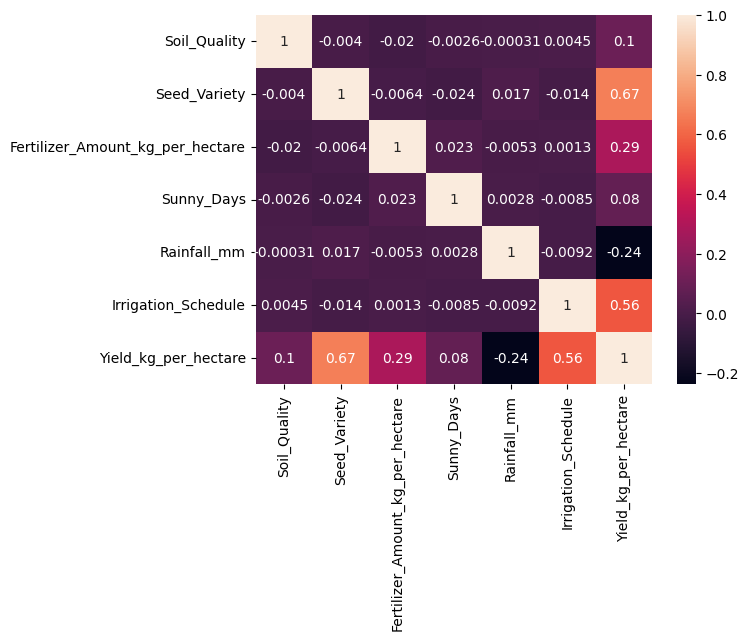

In [ ]:
cor_mat=agri_yield.corr()
sns.heatmap(cor_mat,annot=True)

In [ ]:
#Training and Test data
x=agri_yield.drop('Yield_kg_per_hectare',axis=1)
y=agri_yield[['Yield_kg_per_hectare']]

In [ ]:
#Features scalling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
m=scaler.fit(x)
new_feature=m.transform(x)

In [ ]:
#Splitting of data into training and testing
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=42)

In [ ]:
#Use of linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [ ]:
#Prediction based on test data
y_pred = lr.predict(x_test)
y_pred

In [ ]:
#Evaluation using metrix
from sklearn import metrics as mat
from sklearn.metrics import mean_squared_error, r2_score
mae =mat.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error :",mse)

Mean Absolute Error : 38.89230481844771
Mean Squared Error : 2327.076862515064


In [ ]:
#To find the variance
lr_r2_score = r2_score(y_test, y_pred)


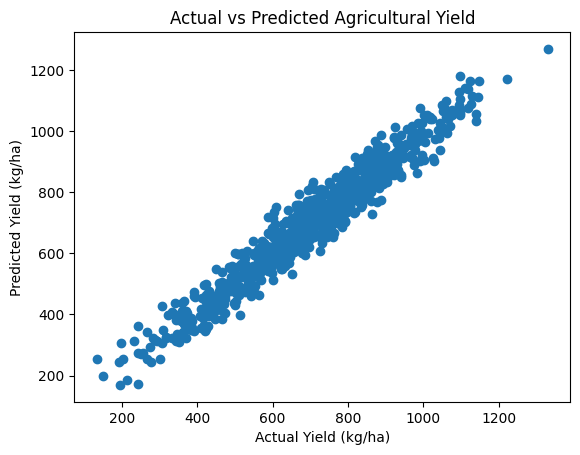

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Yield (kg/ha)')
plt.ylabel('Predicted Yield (kg/ha)')
plt.title('Actual vs Predicted Agricultural Yield')
plt.show()

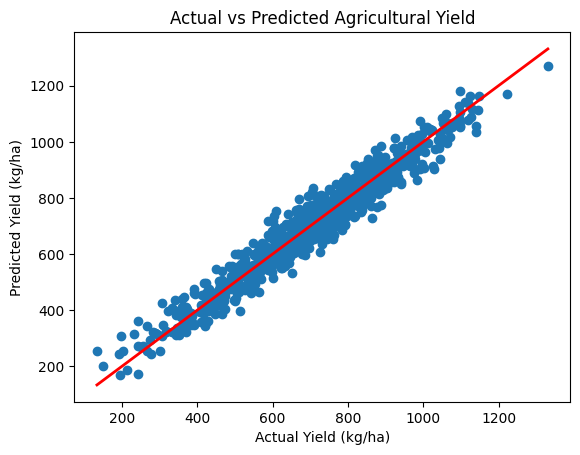

In [ ]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', linewidth=2)  # Diagonal line
plt.xlabel('Actual Yield (kg/ha)')
plt.ylabel('Predicted Yield (kg/ha)')
plt.title('Actual vs Predicted Agricultural Yield')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


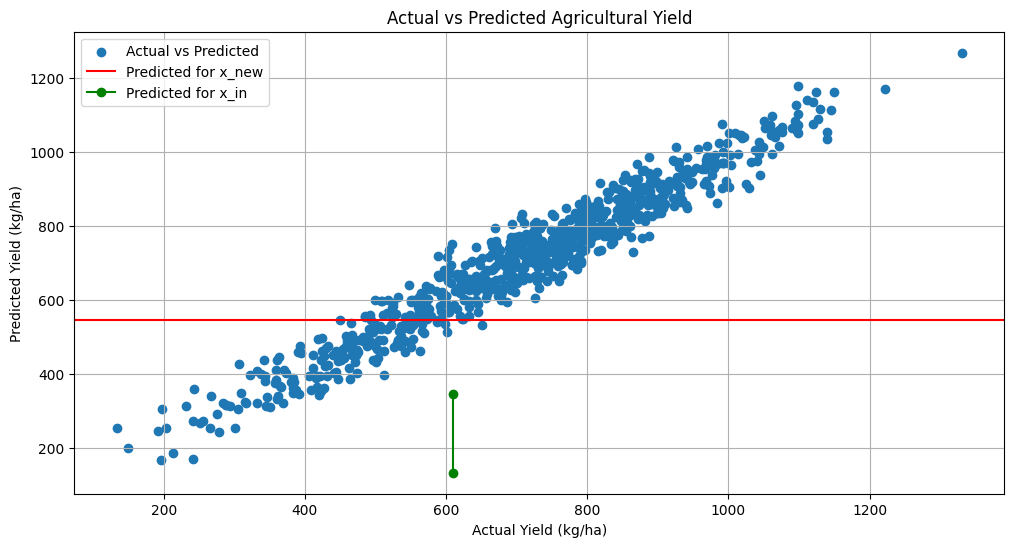

In [ ]:
# Assuming x_new and y_new are provided
x_new = np.array([[92.304721, 0, 140.522218, 100.670922, 200.386237, 3]])
y_new = lr.predict(x_new)

# Assuming x_in is provided for another data point
x_in = np.array([[91.304721, 0, 140.522218, 100.670922, 610.386237, 3]]).reshape(-1, 6)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test,y_pred, label='Actual vs Predicted')

# Line plot for the predicted value based on x_new and y_new
plt.axhline(y=y_new,color='red', linestyle='-', label='Predicted for x_new')

# Line plot for the predicted values based on x_in and the model
y_in = lr.predict(x_in)
plt.plot([x_in[0, 4], x_in[0, 4]],[y_test.min(), y_in], 'go-', label='Predicted for x_in')

plt.grid(1)
plt.xlabel('Actual Yield (kg/ha)')
plt.ylabel('Predicted Yield (kg/ha)')
plt.title('Actual vs Predicted Agricultural Yield')
plt.legend()
plt.show()

In [ ]:
#m-slope,c-intercept
print("Slope is ",lr.coef_,'\n')
print("Intercept is: ",lr.intercept_)

Slope is  [[  1.47884138 299.21073321   0.80106334   1.91532966  -0.48759184
   50.11555338]] 

Intercept is:  [53.06576581]


In [ ]:
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)
#SVR model for linear Regression
svr_model

SVR(epsilon=0.2, kernel='linear')

In [ ]:
svr_model.fit(x_train,y_train)

# Make predictions on the test data
y_pred_svr = svr_model.predict(x_test)

r2_score_svr=r2_score(y_test,y_pred_svr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Model Ensembling :**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rndm_reg=RandomForestRegressor(n_estimators=50,max_leaf_nodes=6,n_jobs=-1)
rndm_reg.fit(x,y)

<ipython-input-54-32c0372cd411>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rndm_reg.fit(x,y)


RandomForestRegressor(max_leaf_nodes=6, n_estimators=50, n_jobs=-1)

In [ ]:
y_pred_rndm=rndm_reg.predict(x_test)
y_pred_rndm
r2_rndm_reg=r2_score(y_test,y_pred_rndm)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
grb=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=0.9)
grb.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.9, max_depth=2, n_estimators=3)

In [ ]:
y_gbr_pred=grb.predict(x_test)
y_gbr_pred

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()
adr.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor()

In [ ]:
y_pred_adr=adr.predict(x_test)
y_pred_adr

In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb=xgb.predict(x_test)
y_pred_xgb

In [ ]:
#Comparing the accuracy score
print("r2 Score value using Linear regression :",lr_r2_score,'\n')
print("r2 Score value using SVR :",r2_score_svr,'\n')
print("Accuracy using r2 score for XGBRegressor :",r2_score(y_test,y_pred_xgb),'\n')
print("Accuracy using r2 score for AdaBoostRegressor :",r2_score(y_test,y_pred_adr),'\n')
print("Accuracy usi using r2 score for GradientBoostingRegressor  :",r2_score(y_test,y_gbr_pred),'\n')
print("Accuracy prediction using r2 score for RandomForestRegressor :",r2_rndm_reg,'\n')


r2 Score value using Linear regression : 0.9408531473446843 

r2 Score value using SVR : 0.9379068866918341 

Accuracy using r2 score for XGBRegressor : 0.9192519944367975 

Accuracy using r2 score for AdaBoostRegressor : 0.8702137566884872 

Accuracy usi using r2 score for GradientBoostingRegressor  : 0.8238420067890115 

Accuracy prediction using r2 score for RandomForestRegressor : 0.7583493982068985 

